# Gaussian Naive Bayes Classifier

**Gaussian Naive Bayes classifier** is a probabilistic algorithm that uses **Bayes theorem** to make predictions. It is a simple yet effective algorithm that is commonly used in classification tasks, particularly in natural language processing and text classification.
Gaussian Naive Bayes supports **continuous valued features** and models each as conforming to a Gaussian (normal) distribution.

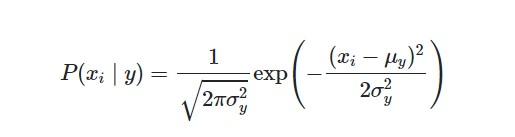

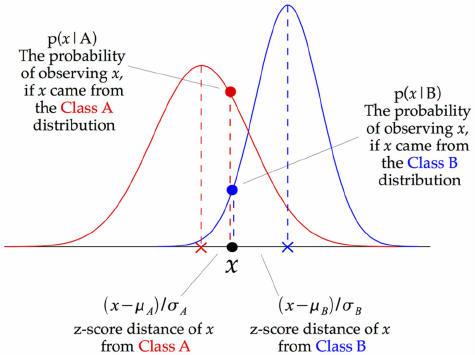

Above illustration indicates how a Gaussian Naive Bayes (GNB) classifier works. At every data point, the z-score distance between that point and each class-mean is calculated, namely the distance from the class mean divided by the standard deviation of that class.

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp
from sklearn.metrics import ConfusionMatrixDisplay

## 2. Importing Data

In [2]:
data= pd.read_csv('Datasets/data.csv')

## 3. Visualizing Dataset

We shall now examine **Malignant tumor** and **Benign tumor** by examining their **average radius** and **texture**

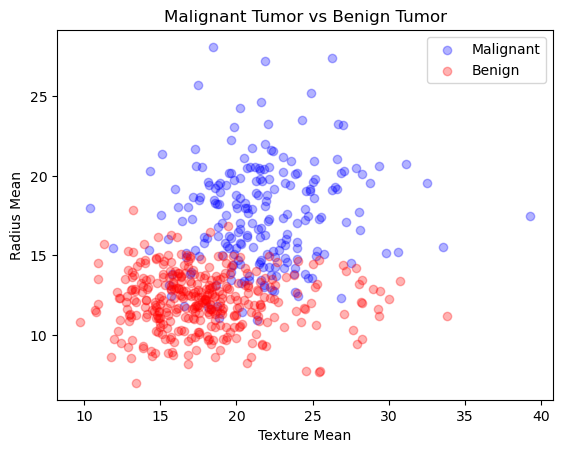

In [3]:
M=data[data.diagnosis=='M']
B=data[data.diagnosis=='B']

mtp.title("Malignant Tumor vs Benign Tumor")
mtp.xlabel("Texture Mean")
mtp.ylabel("Radius Mean")

mtp.scatter( M.texture_mean, M.radius_mean, color = "Blue", label = "Malignant", alpha = 0.3)
mtp.scatter(B.texture_mean, B.radius_mean,  color = "Red", label = "Benign", alpha = 0.3)
mtp.legend()
mtp.show()

## 4. Data Cleaning

In [4]:
# Remove duplicate rows
data = data.drop_duplicates()
#Remove unnecessary columns
data = data.drop(columns=["id","Unnamed: 32"])

## 5. Data Preprocessing

**Malignant tumors** will be assigned a value of '1' and **Benign tumors** will be assigned a value of '0'.

In [5]:
data.diagnosis = [1 if i == "M" else 0 for i in data.diagnosis]

Now, Split the Dataframe into x and y components. x includes all independent predictor factors and y provides the diagnosis.values

In [6]:
x = data.drop(["diagnosis"], axis = 1)
y = data.diagnosis.values

###  Data Normalization

**Normalize** the data to maximize the **Model's Efficiency**

In [7]:
x = (x - np.min(x,axis=0)) / (np.max(x,axis=0) - np.min(x,axis=0))

## 6. Data Splitting

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

### Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test) 

## 7. Training Model

We will Create a class for **Gaussian Naive Bayes Model** 

In [10]:
class GaussianNB:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = np.zeros((len(self.classes), X.shape[1]))
        self.var = np.zeros((len(self.classes), X.shape[1]))
        self.prior = np.zeros(len(self.classes))
        
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[i, :] = X_c.mean(axis=0)
            self.var[i, :] = X_c.var(axis=0)
            self.prior[i] = X_c.shape[0] / X.shape[0]
    
    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        
        for i, x in enumerate(X):
            posteriors = []
            
            for j, c in enumerate(self.classes):
                prior = np.log(self.prior[j])
                likelihood = np.sum(np.log(self._pdf(j, x)))
                posterior = prior + likelihood
                posteriors.append(posterior)
            
            y_pred[i] = self.classes[np.argmax(posteriors)]
        
        return y_pred
    
    def _pdf(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(-(x-mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

In [11]:
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test) 

## 8. Evaluation of Performance

### Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix (Gaussian NB)')

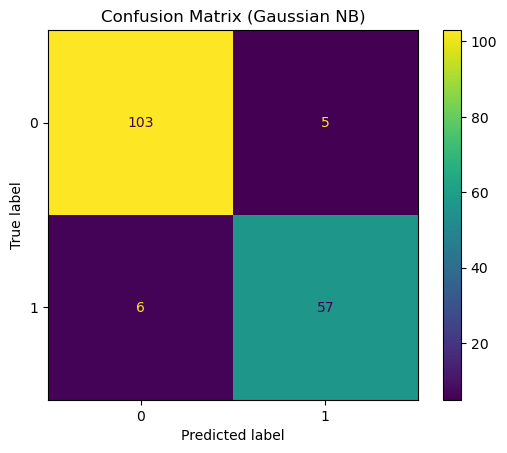

In [12]:
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
ax = cm.ax_
ax.set_title("Confusion Matrix (Gaussian NB)")

### Accuracy

It measures the proportion of correct predictions made by the model among all predictions made.

In [13]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.4f}".format(accuracy))

Accuracy: 0.9357


### Precision

It measures the proportion of true positive predictions among all positive predictions made by the model.

In [14]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)

print("Precision: {:.4f}".format(precision))

Precision: 0.9194


### Recall

It measures the proportion of true positive predictions among all actual positive instances in the dataset.

In [15]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)

print("Recall: {:.4f}".format(recall))

Recall: 0.9048
